### **환경 설정**

In [1]:
# Check nvcc version
!nvcc -V
# Check GCC version
!gcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [2]:
# install dependencies: (use cu111 because colab has CUDA 11.1)
!pip install torch==1.9.0+cu111 torchvision==0.10.0+cu111 -f https://download.pytorch.org/whl/torch_stable.html

# install mmcv-full thus we could use CUDA operators
!pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu111/torch1.9.0/index.html

# Install mmdetection
!rm -rf mmdetection
!git clone https://github.com/open-mmlab/mmdetection.git
%cd mmdetection

!pip install -e .

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |█████████████                   | 834.1 MB 1.8 MB/s eta 0:11:03tcmalloc: large alloc 1147494400 bytes == 0x39e86000 @  0x7f3187634615 0x592b76 0x4df71e 0x59afff 0x515655 0x549576 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x548ae9 0x5127f1 0x598e3b 0x511f68 0x598e3b 0x511f68 0x598e3b 0x511f68 0x4bc98a 0x532e76 0x594b72 0x515600 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x593fce 0x5118f8 0x593dd7
     |████████████████▌               | 1055.7 MB 1.4 MB/s eta 0:11:46tcmalloc: large alloc 1434370048 bytes == 0x7e4dc000 @  0x7f3187634615 0x592b76 0x4df71e 0x59afff 0x515655 0x549576 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x548ae9 0x5127f1 0x598e3b 0x511f68 0x598e3b 0x511f68 0x598e3b 0x511f68 0x4bc98a 0x532e76 0x594b72 0x515600 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x593fce 0x5118f8 0x593dd7
     |█████████████████████           | 1336.2 MB 1.3 MB/s eta 0:08:55tcmalloc: large alloc 1792966656 bytes =

In [3]:
from mmcv import collect_env
collect_env()

{'CUDA available': True,
 'CUDA_HOME': '/usr/local/cuda',
 'GCC': 'x86_64-linux-gnu-gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0',
 'GPU 0': 'Tesla P100-PCIE-16GB',
 'MMCV': '1.5.0',
 'MMCV CUDA Compiler': '11.1',
 'MMCV Compiler': 'GCC 7.3',
 'NVCC': 'Cuda compilation tools, release 11.1, V11.1.105',
 'OpenCV': '4.1.2',
 'PyTorch': '1.9.0+cu111',
 'PyTorch compiling details': 'PyTorch built with:\n  - GCC 7.3\n  - C++ Version: 201402\n  - Intel(R) Math Kernel Library Version 2020.0.0 Product Build 20191122 for Intel(R) 64 architecture applications\n  - Intel(R) MKL-DNN v2.1.2 (Git Hash 98be7e8afa711dc9b66c8ff3504129cb82013cdb)\n  - OpenMP 201511 (a.k.a. OpenMP 4.5)\n  - NNPACK is enabled\n  - CPU capability usage: AVX2\n  - CUDA Runtime 11.1\n  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_50;-gencode;arch=compute_60,code=sm_60;-gencode;arch=compute_70,code=sm_70;-gencode;arch=compute_75,code=sm_75;-gencode;arch=compute_80,code=sm_80;-genco

In [4]:
# Check Pytorch installation
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

# Check MMDetection installation
import mmdet
print(mmdet.__version__)

# Check mmcv installation
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print(get_compiling_cuda_version())
print(get_compiler_version())

1.9.0+cu111 True
2.24.1
11.1
GCC 7.3


In [5]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


### **데이터셋 다운로드**

In [6]:
# Download dataset
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="MY_API_KEY")
project = rf.workspace("sketch").project("sketch-detection")
dataset = project.version(2).download("coco")

     |████████████████████████████████| 145 kB 11.6 MB/s 
     |████████████████████████████████| 178 kB 50.7 MB/s 
     |████████████████████████████████| 1.1 MB 41.8 MB/s 
     |████████████████████████████████| 67 kB 5.3 MB/s 
     |████████████████████████████████| 54 kB 2.9 MB/s 
     |████████████████████████████████| 138 kB 51.3 MB/s 
     |████████████████████████████████| 596 kB 43.3 MB/s 
     |████████████████████████████████| 63 kB 1.9 MB/s 
  Created wheel for roboflow: filename=roboflow-0.2.4-py3-none-any.whl size=21356 sha256=fa355790bb8ef9b2dc66aed2b085ddb3e5ab9fe51cc9a6ae16f4c1332fe4cbc4
  Stored in directory: /root/.cache/pip/wheels/b7/2c/60/3733c0e323b1d7aec00f852264314bf6c48192c8e1dc92b3ee
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=490ecf9d394cebb7deb91d875ba9abaaae6c19fac4264a2e0c992266e5ce220f
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built roboflow wge

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to sketch-detection-2 in coco:: 100%|██████████| 3309/3309 [00:04<00:00, 805.12it/s]


In [7]:
# Check the directory structure of the data
# Install tree first
!apt-get -q install tree
!tree sketch-detection-2

Reading package lists...
Building dependency tree...
Reading state information...
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'apt autoremove' to remove them.
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 42 not upgraded.
Need to get 40.7 kB of archives.
After this operation, 105 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tree amd64 1.7.0-5 [40.7 kB]
Fetched 40.7 kB in 0s (744 kB/s)
Selecting previously unselected package tree.
(Reading database ... 155203 files and directories currently installed.)
Preparing to unpack .../tree_1.7.0-5_amd64.deb ...
Unpacking tree (1.7.0-5) ...
Setting up tree (1.7.0-5) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
sketch-detection-2
├── README.dataset.txt
├── README.roboflow.txt
├── test
│   ├── 0001_jpg.rf.aedeb9a8f382628dfccf863de743946e.jp

In [8]:
# Check annotation file
!cat /content/mmdetection/sketch-detection-2/train/_annotations.coco.json

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
            "id": 2346,
            "image_id": 2346,
            "category_id": 6,
            "bbox": [
                0,
                0,
                413.5,
                408
            ],
            "area": 168708,
            "segmentation": [],
            "iscrowd": 0
        },
        {
            "id": 2347,
            "image_id": 2347,
            "category_id": 10,
            "bbox": [
                0,
                0,
                414,
                414
            ],
            "area": 171396,
            "segmentation": [],
            "iscrowd": 0
        },
        {
            "id": 2348,
            "image_id": 2348,
            "category_id": 1,
            "bbox": [
                0,
                0,
                414,
                411.5
            ],
            "area": 170361,
            "segmentation": [],
            "iscrowd": 0
        },
        {
            "id": 2349,
            "imag

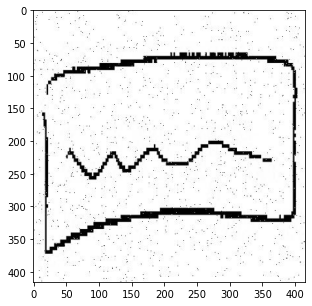

In [9]:
# Let's take a look at the dataset image
import mmcv
import matplotlib.pyplot as plt

img = mmcv.imread('sketch-detection-2/train/0001_jpg.rf.23fc543b43d75f068b42912192e31140.jpg')
plt.figure(figsize=(5, 5))
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

### **Faster R-CNN**

<img src="https://user-images.githubusercontent.com/40661020/143881188-ab87720f-5059-4b4e-a928-b540fb8fb84d.png" width=500/>

In [10]:
from mmcv import Config
from mmdet.apis import set_random_seed

cfg = Config.fromfile('./configs/faster_rcnn/faster_rcnn_r50_caffe_fpn_mstrain_1x_coco.py')

print(cfg.pretty_text)

model = dict(
    type='FasterRCNN',
    backbone=dict(
        type='ResNet',
        depth=50,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        frozen_stages=1,
        norm_cfg=dict(type='BN', requires_grad=False),
        norm_eval=True,
        style='caffe',
        init_cfg=dict(
            type='Pretrained',
            checkpoint='open-mmlab://detectron2/resnet50_caffe')),
    neck=dict(
        type='FPN',
        in_channels=[256, 512, 1024, 2048],
        out_channels=256,
        num_outs=5),
    rpn_head=dict(
        type='RPNHead',
        in_channels=256,
        feat_channels=256,
        anchor_generator=dict(
            type='AnchorGenerator',
            scales=[8],
            ratios=[0.5, 1.0, 2.0],
            strides=[4, 8, 16, 32, 64]),
        bbox_coder=dict(
            type='DeltaXYWHBBoxCoder',
            target_means=[0.0, 0.0, 0.0, 0.0],
            target_stds=[1.0, 1.0, 1.0, 1.0]),
        loss_cls=dict(
            type='CrossEntrop

In [11]:
# config 설정

data_root = '/content/mmdetection/sketch-detection-2/'
ann_file = '_annotations.coco.json'

cfg.data_root = data_root

cfg.data.train.ann_file = data_root + 'train/' + ann_file
cfg.data.train.img_prefix = data_root + 'train/'
cfg.data.train.classes = (
                      'button', 'checkbox_checked', 'checkbox_unchecked',
                      'chip', 'data_table', 'dropdown_menu',
                      'floating_action_button', 'image', 'radiobutton_checked',
                      'radiobutton_unchecked', 'slider', 'switch_disabled',
                      'switch_enabled', 'text_field', 'text_area')

cfg.data.val.ann_file = data_root + 'valid/' + ann_file
cfg.data.val.img_prefix = data_root + 'valid/'
cfg.data.val.classes = (
                      'button', 'checkbox_checked', 'checkbox_unchecked',
                      'chip', 'data_table', 'dropdown_menu',
                      'floating_action_button', 'image', 'radiobutton_checked',
                      'radiobutton_unchecked', 'slider', 'switch_disabled',
                      'switch_enabled', 'text_field', 'text_area')

cfg.data.test.ann_file = data_root + 'test/' + ann_file
cfg.data.test.img_prefix = data_root + 'test/'
cfg.data.test.classes = (
                      'button', 'checkbox_checked', 'checkbox_unchecked',
                      'chip', 'data_table', 'dropdown_menu',
                      'floating_action_button', 'image', 'radiobutton_checked',
                      'radiobutton_unchecked', 'slider', 'switch_disabled',
                      'switch_enabled', 'text_field', 'text_area')

cfg.optimizer.lr = 0.0025

cfg.model.roi_head.bbox_head.num_classes = 15

cfg.runner.max_epochs = 30
cfg.max_epochs = 30

cfg.work_dir = 'working/faster_rcnn'

cfg.seed = 0

cfg.gpu_ids = [0]
cfg.device = 'cuda'

cfg.log_config.interval = 100

In [12]:
print(cfg.pretty_text)

# config 파일 저장
with open("faster_rcnn.py","w") as f:
  f.write(cfg.pretty_text)

!cp faster_rcnn.py /content/drive/MyDrive/model/faster_rcnn

model = dict(
    type='FasterRCNN',
    backbone=dict(
        type='ResNet',
        depth=50,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        frozen_stages=1,
        norm_cfg=dict(type='BN', requires_grad=False),
        norm_eval=True,
        style='caffe',
        init_cfg=dict(
            type='Pretrained',
            checkpoint='open-mmlab://detectron2/resnet50_caffe')),
    neck=dict(
        type='FPN',
        in_channels=[256, 512, 1024, 2048],
        out_channels=256,
        num_outs=5),
    rpn_head=dict(
        type='RPNHead',
        in_channels=256,
        feat_channels=256,
        anchor_generator=dict(
            type='AnchorGenerator',
            scales=[8],
            ratios=[0.5, 1.0, 2.0],
            strides=[4, 8, 16, 32, 64]),
        bbox_coder=dict(
            type='DeltaXYWHBBoxCoder',
            target_means=[0.0, 0.0, 0.0, 0.0],
            target_stds=[1.0, 1.0, 1.0, 1.0]),
        loss_cls=dict(
            type='CrossEntrop

In [ ]:
# 학습

import os.path as osp

from mmdet.datasets import build_dataset
from mmdet.models import build_detector
from mmdet.apis import train_detector

# Build dataset
datasets = [build_dataset(cfg.data.train)]

# Build the detector
model = build_detector(cfg.model)
# Add an attribute for visualization convenience
model.CLASSES = datasets[0].CLASSES

# Create work_dir
mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))
train_detector(model, datasets, cfg, distributed=False, validate=True)

# Save checkpoints
!cp -r /content/mmdetection/working/faster_rcnn /content/drive/MyDrive/model

loading annotations into memory...
Done (t=0.02s)
creating index...
index created!


2022-05-14 05:46:41,494 - mmdet - INFO - Automatic scaling of learning rate (LR) has been disabled.
2022-05-14 05:46:41,506 - mmdet - INFO - Start running, host: root@2819bf16a767, work_dir: /content/mmdetection/working/yolof
2022-05-14 05:46:41,507 - mmdet - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) StepLrUpdaterHook                  
(NORMAL      ) CheckpointHook                     
(LOW         ) EvalHook                           
(VERY_LOW    ) TextLoggerHook                     
 -------------------- 
before_train_epoch:
(VERY_HIGH   ) StepLrUpdaterHook                  
(NORMAL      ) NumClassCheckHook                  
(LOW         ) IterTimerHook                      
(LOW         ) EvalHook                           
(VERY_LOW    ) TextLoggerHook                     
 -------------------- 
before_train_iter:
(VERY_HIGH   ) StepLrUpdaterHook                  
(LOW         ) IterTimerHook                      
(LOW         ) EvalHook     

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


2022-05-14 05:47:07,395 - mmdet - INFO - Epoch [1][100/1352]	lr: 4.970e-04, eta: 2:53:47, time: 0.258, data_time: 0.030, memory: 4029, loss_rpn_cls: 0.0789, loss_rpn_bbox: 0.1132, loss_cls: 0.2097, acc: 94.3018, loss_bbox: 0.1524, loss: 0.5542
2022-05-14 05:47:31,167 - mmdet - INFO - Epoch [1][200/1352]	lr: 9.965e-04, eta: 2:46:37, time: 0.238, data_time: 0.009, memory: 4029, loss_rpn_cls: 0.0294, loss_rpn_bbox: 0.0438, loss_cls: 0.1300, acc: 96.5547, loss_bbox: 0.1322, loss: 0.3354
2022-05-14 05:47:54,699 - mmdet - INFO - Epoch [1][300/1352]	lr: 1.496e-03, eta: 2:43:26, time: 0.235, data_time: 0.008, memory: 4029, loss_rpn_cls: 0.0283, loss_rpn_bbox: 0.0306, loss_cls: 0.1023, acc: 97.2305, loss_bbox: 0.1053, loss: 0.2665
2022-05-14 05:48:18,912 - mmdet - INFO - Epoch [1][400/1352]	lr: 1.996e-03, eta: 2:42:46, time: 0.242, data_time: 0.010, memory: 4029, loss_rpn_cls: 0.0245, loss_rpn_bbox: 0.0256, loss_cls: 0.0954, acc: 97.3564, loss_bbox: 0.0959, loss: 0.2414
2022-05-14 05:48:42,616 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 298/298, 14.4 task/s, elapsed: 21s, ETA:     0s

2022-05-14 05:52:28,695 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=1.10s).
Accumulating evaluation results...


2022-05-14 05:52:30,139 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.221
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.391
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.205
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.221
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.645
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.645
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.645
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=

DONE (t=0.30s).


2022-05-14 05:52:56,366 - mmdet - INFO - Epoch [2][100/1352]	lr: 2.500e-03, eta: 2:31:41, time: 0.261, data_time: 0.030, memory: 4029, loss_rpn_cls: 0.0221, loss_rpn_bbox: 0.0183, loss_cls: 0.1012, acc: 96.7910, loss_bbox: 0.0746, loss: 0.2162
2022-05-14 05:53:20,033 - mmdet - INFO - Epoch [2][200/1352]	lr: 2.500e-03, eta: 2:31:27, time: 0.237, data_time: 0.009, memory: 4029, loss_rpn_cls: 0.0206, loss_rpn_bbox: 0.0196, loss_cls: 0.0997, acc: 96.8662, loss_bbox: 0.0733, loss: 0.2132
2022-05-14 05:53:44,107 - mmdet - INFO - Epoch [2][300/1352]	lr: 2.500e-03, eta: 2:31:22, time: 0.241, data_time: 0.008, memory: 4029, loss_rpn_cls: 0.0197, loss_rpn_bbox: 0.0205, loss_cls: 0.0854, acc: 97.3076, loss_bbox: 0.0676, loss: 0.1931
2022-05-14 05:54:08,099 - mmdet - INFO - Epoch [2][400/1352]	lr: 2.500e-03, eta: 2:31:13, time: 0.240, data_time: 0.009, memory: 4029, loss_rpn_cls: 0.0203, loss_rpn_bbox: 0.0188, loss_cls: 0.0879, acc: 97.1992, loss_bbox: 0.0653, loss: 0.1923
2022-05-14 05:54:32,128 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 298/298, 14.5 task/s, elapsed: 20s, ETA:     0s

2022-05-14 05:58:18,568 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.71s).
Accumulating evaluation results...


2022-05-14 05:58:19,531 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.495
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.666
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.535
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.495
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.801
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.801
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.801
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=

DONE (t=0.22s).


2022-05-14 05:58:45,654 - mmdet - INFO - Epoch [3][100/1352]	lr: 2.500e-03, eta: 2:26:14, time: 0.260, data_time: 0.029, memory: 4029, loss_rpn_cls: 0.0164, loss_rpn_bbox: 0.0176, loss_cls: 0.0736, acc: 97.5732, loss_bbox: 0.0596, loss: 0.1672
2022-05-14 05:59:09,305 - mmdet - INFO - Epoch [3][200/1352]	lr: 2.500e-03, eta: 2:25:57, time: 0.237, data_time: 0.008, memory: 4029, loss_rpn_cls: 0.0162, loss_rpn_bbox: 0.0180, loss_cls: 0.0781, acc: 97.3721, loss_bbox: 0.0596, loss: 0.1720
2022-05-14 05:59:33,179 - mmdet - INFO - Epoch [3][300/1352]	lr: 2.500e-03, eta: 2:25:41, time: 0.239, data_time: 0.009, memory: 4029, loss_rpn_cls: 0.0149, loss_rpn_bbox: 0.0185, loss_cls: 0.0830, acc: 97.3301, loss_bbox: 0.0602, loss: 0.1766
2022-05-14 05:59:57,148 - mmdet - INFO - Epoch [3][400/1352]	lr: 2.500e-03, eta: 2:25:26, time: 0.240, data_time: 0.009, memory: 4029, loss_rpn_cls: 0.0166, loss_rpn_bbox: 0.0192, loss_cls: 0.0806, acc: 97.4551, loss_bbox: 0.0571, loss: 0.1734
2022-05-14 06:00:21,036 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 298/298, 14.5 task/s, elapsed: 21s, ETA:     0s

2022-05-14 06:04:06,494 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.66s).
Accumulating evaluation results...


2022-05-14 06:04:07,518 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.603
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.777
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.671
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.603
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.821
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.821
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.821
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=

DONE (t=0.22s).


2022-05-14 06:04:33,687 - mmdet - INFO - Epoch [4][100/1352]	lr: 2.500e-03, eta: 2:20:44, time: 0.260, data_time: 0.030, memory: 4029, loss_rpn_cls: 0.0114, loss_rpn_bbox: 0.0183, loss_cls: 0.0632, acc: 97.9023, loss_bbox: 0.0548, loss: 0.1477
2022-05-14 06:04:57,267 - mmdet - INFO - Epoch [4][200/1352]	lr: 2.500e-03, eta: 2:20:25, time: 0.236, data_time: 0.009, memory: 4029, loss_rpn_cls: 0.0113, loss_rpn_bbox: 0.0196, loss_cls: 0.0634, acc: 97.8975, loss_bbox: 0.0559, loss: 0.1502
2022-05-14 06:05:21,002 - mmdet - INFO - Epoch [4][300/1352]	lr: 2.500e-03, eta: 2:20:06, time: 0.237, data_time: 0.008, memory: 4029, loss_rpn_cls: 0.0111, loss_rpn_bbox: 0.0175, loss_cls: 0.0681, acc: 97.7314, loss_bbox: 0.0552, loss: 0.1519
2022-05-14 06:05:44,901 - mmdet - INFO - Epoch [4][400/1352]	lr: 2.500e-03, eta: 2:19:48, time: 0.239, data_time: 0.008, memory: 4029, loss_rpn_cls: 0.0107, loss_rpn_bbox: 0.0186, loss_cls: 0.0600, acc: 97.9219, loss_bbox: 0.0512, loss: 0.1405
2022-05-14 06:06:08,811 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 298/298, 14.2 task/s, elapsed: 21s, ETA:     0s

2022-05-14 06:09:56,051 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2022-05-14 06:09:56,903 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.703
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.836
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.803
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.703
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.873
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.873
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.873
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=

DONE (t=0.66s).
Accumulating evaluation results...
DONE (t=0.17s).


2022-05-14 06:10:23,177 - mmdet - INFO - Epoch [5][100/1352]	lr: 2.500e-03, eta: 2:15:28, time: 0.261, data_time: 0.030, memory: 4029, loss_rpn_cls: 0.0072, loss_rpn_bbox: 0.0168, loss_cls: 0.0514, acc: 98.2441, loss_bbox: 0.0516, loss: 0.1270
2022-05-14 06:10:46,840 - mmdet - INFO - Epoch [5][200/1352]	lr: 2.500e-03, eta: 2:15:08, time: 0.237, data_time: 0.008, memory: 4029, loss_rpn_cls: 0.0073, loss_rpn_bbox: 0.0157, loss_cls: 0.0523, acc: 98.1318, loss_bbox: 0.0491, loss: 0.1245
2022-05-14 06:11:10,911 - mmdet - INFO - Epoch [5][300/1352]	lr: 2.500e-03, eta: 2:14:50, time: 0.241, data_time: 0.008, memory: 4029, loss_rpn_cls: 0.0077, loss_rpn_bbox: 0.0182, loss_cls: 0.0539, acc: 98.1162, loss_bbox: 0.0483, loss: 0.1280
2022-05-14 06:11:34,909 - mmdet - INFO - Epoch [5][400/1352]	lr: 2.500e-03, eta: 2:14:32, time: 0.240, data_time: 0.008, memory: 4029, loss_rpn_cls: 0.0079, loss_rpn_bbox: 0.0201, loss_cls: 0.0493, acc: 98.4229, loss_bbox: 0.0486, loss: 0.1259
2022-05-14 06:11:59,006 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 298/298, 14.1 task/s, elapsed: 21s, ETA:     0s

2022-05-14 06:15:47,456 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2022-05-14 06:15:48,183 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.657
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.836
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.772
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.657
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.819
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.819
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.819
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=

DONE (t=0.53s).
Accumulating evaluation results...
DONE (t=0.18s).


2022-05-14 06:16:14,633 - mmdet - INFO - Epoch [6][100/1352]	lr: 2.500e-03, eta: 2:10:23, time: 0.263, data_time: 0.030, memory: 4029, loss_rpn_cls: 0.0084, loss_rpn_bbox: 0.0178, loss_cls: 0.0453, acc: 98.3564, loss_bbox: 0.0443, loss: 0.1158
2022-05-14 06:16:38,483 - mmdet - INFO - Epoch [6][200/1352]	lr: 2.500e-03, eta: 2:10:03, time: 0.239, data_time: 0.008, memory: 4029, loss_rpn_cls: 0.0066, loss_rpn_bbox: 0.0170, loss_cls: 0.0425, acc: 98.4932, loss_bbox: 0.0423, loss: 0.1083
2022-05-14 06:17:02,620 - mmdet - INFO - Epoch [6][300/1352]	lr: 2.500e-03, eta: 2:09:44, time: 0.241, data_time: 0.008, memory: 4029, loss_rpn_cls: 0.0070, loss_rpn_bbox: 0.0176, loss_cls: 0.0456, acc: 98.3916, loss_bbox: 0.0425, loss: 0.1127
2022-05-14 06:17:26,669 - mmdet - INFO - Epoch [6][400/1352]	lr: 2.500e-03, eta: 2:09:25, time: 0.240, data_time: 0.008, memory: 4029, loss_rpn_cls: 0.0071, loss_rpn_bbox: 0.0177, loss_cls: 0.0430, acc: 98.4502, loss_bbox: 0.0409, loss: 0.1086
2022-05-14 06:17:50,763 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 298/298, 14.4 task/s, elapsed: 21s, ETA:     0s

2022-05-14 06:21:38,466 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2022-05-14 06:21:39,334 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.737
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.862
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.831
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.737
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.878
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.878
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.878
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=

DONE (t=0.68s).
Accumulating evaluation results...
DONE (t=0.18s).


2022-05-14 06:22:05,772 - mmdet - INFO - Epoch [7][100/1352]	lr: 2.500e-03, eta: 2:05:14, time: 0.263, data_time: 0.029, memory: 4029, loss_rpn_cls: 0.0054, loss_rpn_bbox: 0.0172, loss_cls: 0.0430, acc: 98.4482, loss_bbox: 0.0398, loss: 0.1053
2022-05-14 06:22:29,519 - mmdet - INFO - Epoch [7][200/1352]	lr: 2.500e-03, eta: 2:04:53, time: 0.237, data_time: 0.008, memory: 4029, loss_rpn_cls: 0.0048, loss_rpn_bbox: 0.0156, loss_cls: 0.0383, acc: 98.6230, loss_bbox: 0.0368, loss: 0.0954
2022-05-14 06:22:53,530 - mmdet - INFO - Epoch [7][300/1352]	lr: 2.500e-03, eta: 2:04:32, time: 0.240, data_time: 0.008, memory: 4029, loss_rpn_cls: 0.0050, loss_rpn_bbox: 0.0170, loss_cls: 0.0404, acc: 98.5039, loss_bbox: 0.0372, loss: 0.0995
2022-05-14 06:23:17,563 - mmdet - INFO - Epoch [7][400/1352]	lr: 2.500e-03, eta: 2:04:12, time: 0.240, data_time: 0.008, memory: 4029, loss_rpn_cls: 0.0054, loss_rpn_bbox: 0.0166, loss_cls: 0.0387, acc: 98.5713, loss_bbox: 0.0383, loss: 0.0990
2022-05-14 06:23:41,580 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 298/298, 14.3 task/s, elapsed: 21s, ETA:     0s

2022-05-14 06:27:28,844 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2022-05-14 06:27:29,449 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.790
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.883
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.875
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.790
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.906
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.906
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.906
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=

DONE (t=0.44s).
Accumulating evaluation results...
DONE (t=0.16s).


2022-05-14 06:27:55,898 - mmdet - INFO - Epoch [8][100/1352]	lr: 2.500e-03, eta: 2:00:01, time: 0.263, data_time: 0.030, memory: 4029, loss_rpn_cls: 0.0044, loss_rpn_bbox: 0.0163, loss_cls: 0.0351, acc: 98.8096, loss_bbox: 0.0349, loss: 0.0907
2022-05-14 06:28:19,725 - mmdet - INFO - Epoch [8][200/1352]	lr: 2.500e-03, eta: 1:59:40, time: 0.238, data_time: 0.008, memory: 4029, loss_rpn_cls: 0.0041, loss_rpn_bbox: 0.0140, loss_cls: 0.0338, acc: 98.7568, loss_bbox: 0.0318, loss: 0.0837
2022-05-14 06:28:43,809 - mmdet - INFO - Epoch [8][300/1352]	lr: 2.500e-03, eta: 1:59:19, time: 0.241, data_time: 0.008, memory: 4029, loss_rpn_cls: 0.0045, loss_rpn_bbox: 0.0141, loss_cls: 0.0325, acc: 98.8018, loss_bbox: 0.0336, loss: 0.0847
2022-05-14 06:29:07,928 - mmdet - INFO - Epoch [8][400/1352]	lr: 2.500e-03, eta: 1:58:59, time: 0.241, data_time: 0.008, memory: 4029, loss_rpn_cls: 0.0040, loss_rpn_bbox: 0.0164, loss_cls: 0.0330, acc: 98.8574, loss_bbox: 0.0321, loss: 0.0855
2022-05-14 06:29:32,001 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 298/298, 14.3 task/s, elapsed: 21s, ETA:     0s

2022-05-14 06:33:18,798 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.56s).
Accumulating evaluation results...


2022-05-14 06:33:19,631 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.786
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.895
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.876
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.786
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.895
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.895
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.895
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=

DONE (t=0.25s).


2022-05-14 06:33:45,819 - mmdet - INFO - Epoch [9][100/1352]	lr: 2.500e-04, eta: 1:54:47, time: 0.261, data_time: 0.029, memory: 4029, loss_rpn_cls: 0.0031, loss_rpn_bbox: 0.0134, loss_cls: 0.0293, acc: 98.9639, loss_bbox: 0.0279, loss: 0.0736
2022-05-14 06:34:09,540 - mmdet - INFO - Epoch [9][200/1352]	lr: 2.500e-04, eta: 1:54:25, time: 0.237, data_time: 0.008, memory: 4029, loss_rpn_cls: 0.0037, loss_rpn_bbox: 0.0139, loss_cls: 0.0272, acc: 98.9844, loss_bbox: 0.0260, loss: 0.0707
2022-05-14 06:34:33,563 - mmdet - INFO - Epoch [9][300/1352]	lr: 2.500e-04, eta: 1:54:04, time: 0.240, data_time: 0.009, memory: 4029, loss_rpn_cls: 0.0035, loss_rpn_bbox: 0.0129, loss_cls: 0.0292, acc: 98.9512, loss_bbox: 0.0256, loss: 0.0712
2022-05-14 06:34:57,692 - mmdet - INFO - Epoch [9][400/1352]	lr: 2.500e-04, eta: 1:53:43, time: 0.241, data_time: 0.009, memory: 4029, loss_rpn_cls: 0.0030, loss_rpn_bbox: 0.0138, loss_cls: 0.0285, acc: 98.9590, loss_bbox: 0.0262, loss: 0.0715
2022-05-14 06:35:21,731 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 298/298, 14.1 task/s, elapsed: 21s, ETA:     0s

2022-05-14 06:39:09,597 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2022-05-14 06:39:10,172 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.828
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.897
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.889
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.828
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.937
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.937
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.937
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=

DONE (t=0.40s).
Accumulating evaluation results...
DONE (t=0.15s).


2022-05-14 06:39:36,624 - mmdet - INFO - Epoch [10][100/1352]	lr: 2.500e-04, eta: 1:49:34, time: 0.263, data_time: 0.030, memory: 4029, loss_rpn_cls: 0.0030, loss_rpn_bbox: 0.0133, loss_cls: 0.0305, acc: 98.8525, loss_bbox: 0.0239, loss: 0.0706
2022-05-14 06:40:00,504 - mmdet - INFO - Epoch [10][200/1352]	lr: 2.500e-04, eta: 1:49:12, time: 0.239, data_time: 0.009, memory: 4029, loss_rpn_cls: 0.0028, loss_rpn_bbox: 0.0127, loss_cls: 0.0277, acc: 99.0195, loss_bbox: 0.0246, loss: 0.0679
2022-05-14 06:40:24,631 - mmdet - INFO - Epoch [10][300/1352]	lr: 2.500e-04, eta: 1:48:51, time: 0.241, data_time: 0.009, memory: 4029, loss_rpn_cls: 0.0029, loss_rpn_bbox: 0.0130, loss_cls: 0.0259, acc: 99.0742, loss_bbox: 0.0242, loss: 0.0659
2022-05-14 06:40:48,849 - mmdet - INFO - Epoch [10][400/1352]	lr: 2.500e-04, eta: 1:48:30, time: 0.242, data_time: 0.009, memory: 4029, loss_rpn_cls: 0.0030, loss_rpn_bbox: 0.0134, loss_cls: 0.0264, acc: 99.1338, loss_bbox: 0.0232, loss: 0.0659
2022-05-14 06:41:12,

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 298/298, 14.1 task/s, elapsed: 21s, ETA:     0s

2022-05-14 06:45:01,707 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2022-05-14 06:45:02,427 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.837
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.886
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.884
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.837
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.954
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.954
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.954
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=

DONE (t=0.55s).
Accumulating evaluation results...
DONE (t=0.16s).


2022-05-14 06:45:28,919 - mmdet - INFO - Epoch [11][100/1352]	lr: 2.500e-04, eta: 1:44:23, time: 0.264, data_time: 0.029, memory: 4029, loss_rpn_cls: 0.0031, loss_rpn_bbox: 0.0134, loss_cls: 0.0250, acc: 99.0713, loss_bbox: 0.0231, loss: 0.0646
2022-05-14 06:45:52,787 - mmdet - INFO - Epoch [11][200/1352]	lr: 2.500e-04, eta: 1:44:01, time: 0.239, data_time: 0.008, memory: 4029, loss_rpn_cls: 0.0026, loss_rpn_bbox: 0.0121, loss_cls: 0.0271, acc: 99.0176, loss_bbox: 0.0236, loss: 0.0654
2022-05-14 06:46:16,873 - mmdet - INFO - Epoch [11][300/1352]	lr: 2.500e-04, eta: 1:43:40, time: 0.241, data_time: 0.009, memory: 4029, loss_rpn_cls: 0.0030, loss_rpn_bbox: 0.0127, loss_cls: 0.0246, acc: 99.0703, loss_bbox: 0.0224, loss: 0.0628
2022-05-14 06:46:41,041 - mmdet - INFO - Epoch [11][400/1352]	lr: 2.500e-04, eta: 1:43:18, time: 0.242, data_time: 0.009, memory: 4029, loss_rpn_cls: 0.0035, loss_rpn_bbox: 0.0124, loss_cls: 0.0262, acc: 99.0557, loss_bbox: 0.0231, loss: 0.0652
2022-05-14 06:47:05,

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 298/298, 14.1 task/s, elapsed: 21s, ETA:     0s

2022-05-14 06:50:53,363 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2022-05-14 06:50:53,934 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.847
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.894
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.894
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.847
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.956
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.956
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.956
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=

DONE (t=0.40s).
Accumulating evaluation results...
DONE (t=0.15s).


2022-05-14 06:51:20,407 - mmdet - INFO - Epoch [12][100/1352]	lr: 2.500e-05, eta: 1:39:11, time: 0.263, data_time: 0.030, memory: 4029, loss_rpn_cls: 0.0024, loss_rpn_bbox: 0.0133, loss_cls: 0.0246, acc: 99.1055, loss_bbox: 0.0224, loss: 0.0627
2022-05-14 06:51:44,297 - mmdet - INFO - Epoch [12][200/1352]	lr: 2.500e-05, eta: 1:38:49, time: 0.239, data_time: 0.009, memory: 4029, loss_rpn_cls: 0.0029, loss_rpn_bbox: 0.0130, loss_cls: 0.0248, acc: 99.1484, loss_bbox: 0.0228, loss: 0.0635
2022-05-14 06:52:08,450 - mmdet - INFO - Epoch [12][300/1352]	lr: 2.500e-05, eta: 1:38:27, time: 0.242, data_time: 0.009, memory: 4029, loss_rpn_cls: 0.0024, loss_rpn_bbox: 0.0130, loss_cls: 0.0253, acc: 99.0840, loss_bbox: 0.0222, loss: 0.0629
2022-05-14 06:52:32,615 - mmdet - INFO - Epoch [12][400/1352]	lr: 2.500e-05, eta: 1:38:05, time: 0.242, data_time: 0.009, memory: 4029, loss_rpn_cls: 0.0027, loss_rpn_bbox: 0.0141, loss_cls: 0.0271, acc: 99.0117, loss_bbox: 0.0225, loss: 0.0664
2022-05-14 06:52:56,

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 298/298, 14.1 task/s, elapsed: 21s, ETA:     0s

2022-05-14 06:56:45,318 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2022-05-14 06:56:46,020 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.843
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.893
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.893
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.843
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.955
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.955
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.955
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=

DONE (t=0.53s).
Accumulating evaluation results...
DONE (t=0.16s).


2022-05-14 06:57:12,509 - mmdet - INFO - Epoch [13][100/1352]	lr: 2.500e-05, eta: 1:33:59, time: 0.264, data_time: 0.030, memory: 4029, loss_rpn_cls: 0.0026, loss_rpn_bbox: 0.0115, loss_cls: 0.0225, acc: 99.2002, loss_bbox: 0.0218, loss: 0.0584
2022-05-14 06:57:36,398 - mmdet - INFO - Epoch [13][200/1352]	lr: 2.500e-05, eta: 1:33:36, time: 0.239, data_time: 0.009, memory: 4029, loss_rpn_cls: 0.0031, loss_rpn_bbox: 0.0135, loss_cls: 0.0243, acc: 99.1084, loss_bbox: 0.0229, loss: 0.0639
2022-05-14 06:58:00,557 - mmdet - INFO - Epoch [13][300/1352]	lr: 2.500e-05, eta: 1:33:14, time: 0.242, data_time: 0.008, memory: 4029, loss_rpn_cls: 0.0026, loss_rpn_bbox: 0.0147, loss_cls: 0.0225, acc: 99.1895, loss_bbox: 0.0222, loss: 0.0620
2022-05-14 06:58:24,741 - mmdet - INFO - Epoch [13][400/1352]	lr: 2.500e-05, eta: 1:32:52, time: 0.242, data_time: 0.009, memory: 4029, loss_rpn_cls: 0.0024, loss_rpn_bbox: 0.0127, loss_cls: 0.0256, acc: 99.0645, loss_bbox: 0.0220, loss: 0.0628
2022-05-14 06:58:48,

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 298/298, 14.1 task/s, elapsed: 21s, ETA:     0s

2022-05-14 07:02:36,675 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2022-05-14 07:02:37,267 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.843
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.893
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.893
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.843
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.953
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.953
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.953
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=

DONE (t=0.41s).
Accumulating evaluation results...
DONE (t=0.16s).


2022-05-14 07:03:03,708 - mmdet - INFO - Epoch [14][100/1352]	lr: 2.500e-05, eta: 1:28:45, time: 0.263, data_time: 0.029, memory: 4029, loss_rpn_cls: 0.0028, loss_rpn_bbox: 0.0120, loss_cls: 0.0240, acc: 99.1289, loss_bbox: 0.0209, loss: 0.0597
2022-05-14 07:03:27,626 - mmdet - INFO - Epoch [14][200/1352]	lr: 2.500e-05, eta: 1:28:22, time: 0.239, data_time: 0.008, memory: 4029, loss_rpn_cls: 0.0025, loss_rpn_bbox: 0.0108, loss_cls: 0.0261, acc: 99.1182, loss_bbox: 0.0222, loss: 0.0616
2022-05-14 07:03:51,734 - mmdet - INFO - Epoch [14][300/1352]	lr: 2.500e-05, eta: 1:28:00, time: 0.241, data_time: 0.009, memory: 4029, loss_rpn_cls: 0.0033, loss_rpn_bbox: 0.0124, loss_cls: 0.0251, acc: 99.0518, loss_bbox: 0.0215, loss: 0.0622
2022-05-14 07:04:15,877 - mmdet - INFO - Epoch [14][400/1352]	lr: 2.500e-05, eta: 1:27:38, time: 0.241, data_time: 0.008, memory: 4029, loss_rpn_cls: 0.0022, loss_rpn_bbox: 0.0124, loss_cls: 0.0241, acc: 99.1436, loss_bbox: 0.0211, loss: 0.0598
2022-05-14 07:04:40,

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 298/298, 14.2 task/s, elapsed: 21s, ETA:     0s

2022-05-14 07:08:27,591 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2022-05-14 07:08:28,276 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.848
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.894
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.894
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.848
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.956
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.956
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.956
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=

DONE (t=0.52s).
Accumulating evaluation results...
DONE (t=0.15s).


2022-05-14 07:08:54,733 - mmdet - INFO - Epoch [15][100/1352]	lr: 2.500e-05, eta: 1:23:31, time: 0.263, data_time: 0.030, memory: 4029, loss_rpn_cls: 0.0024, loss_rpn_bbox: 0.0131, loss_cls: 0.0256, acc: 99.0547, loss_bbox: 0.0221, loss: 0.0633
2022-05-14 07:09:18,619 - mmdet - INFO - Epoch [15][200/1352]	lr: 2.500e-05, eta: 1:23:08, time: 0.239, data_time: 0.008, memory: 4029, loss_rpn_cls: 0.0022, loss_rpn_bbox: 0.0122, loss_cls: 0.0249, acc: 99.1016, loss_bbox: 0.0221, loss: 0.0615
2022-05-14 07:09:42,747 - mmdet - INFO - Epoch [15][300/1352]	lr: 2.500e-05, eta: 1:22:46, time: 0.241, data_time: 0.008, memory: 4029, loss_rpn_cls: 0.0028, loss_rpn_bbox: 0.0127, loss_cls: 0.0252, acc: 99.0488, loss_bbox: 0.0214, loss: 0.0621
2022-05-14 07:10:06,883 - mmdet - INFO - Epoch [15][400/1352]	lr: 2.500e-05, eta: 1:22:24, time: 0.241, data_time: 0.008, memory: 4029, loss_rpn_cls: 0.0027, loss_rpn_bbox: 0.0131, loss_cls: 0.0222, acc: 99.2002, loss_bbox: 0.0208, loss: 0.0588
2022-05-14 07:10:31,

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 298/298, 14.2 task/s, elapsed: 21s, ETA:     0s

2022-05-14 07:14:18,851 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2022-05-14 07:14:19,414 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.841
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.892
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.891
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.841
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.951
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.951
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.951
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=

DONE (t=0.40s).
Accumulating evaluation results...
DONE (t=0.15s).


2022-05-14 07:14:45,817 - mmdet - INFO - Epoch [16][100/1352]	lr: 2.500e-05, eta: 1:18:17, time: 0.263, data_time: 0.030, memory: 4029, loss_rpn_cls: 0.0026, loss_rpn_bbox: 0.0126, loss_cls: 0.0247, acc: 99.0986, loss_bbox: 0.0221, loss: 0.0620
2022-05-14 07:15:09,569 - mmdet - INFO - Epoch [16][200/1352]	lr: 2.500e-05, eta: 1:17:54, time: 0.238, data_time: 0.008, memory: 4029, loss_rpn_cls: 0.0023, loss_rpn_bbox: 0.0127, loss_cls: 0.0254, acc: 99.0205, loss_bbox: 0.0224, loss: 0.0628
2022-05-14 07:15:33,610 - mmdet - INFO - Epoch [16][300/1352]	lr: 2.500e-05, eta: 1:17:31, time: 0.240, data_time: 0.008, memory: 4029, loss_rpn_cls: 0.0027, loss_rpn_bbox: 0.0137, loss_cls: 0.0237, acc: 99.1211, loss_bbox: 0.0217, loss: 0.0617
2022-05-14 07:15:57,712 - mmdet - INFO - Epoch [16][400/1352]	lr: 2.500e-05, eta: 1:17:09, time: 0.241, data_time: 0.009, memory: 4029, loss_rpn_cls: 0.0026, loss_rpn_bbox: 0.0128, loss_cls: 0.0248, acc: 99.0830, loss_bbox: 0.0220, loss: 0.0623
2022-05-14 07:16:21,

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 298/298, 14.0 task/s, elapsed: 21s, ETA:     0s

2022-05-14 07:20:10,339 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.43s).
Accumulating evaluation results...


2022-05-14 07:20:10,948 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.841
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.889
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.888
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.841
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.952
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.952
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.952
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=

DONE (t=0.17s).


2022-05-14 07:20:37,354 - mmdet - INFO - Epoch [17][100/1352]	lr: 2.500e-05, eta: 1:13:03, time: 0.263, data_time: 0.030, memory: 4029, loss_rpn_cls: 0.0028, loss_rpn_bbox: 0.0123, loss_cls: 0.0226, acc: 99.2109, loss_bbox: 0.0214, loss: 0.0591
2022-05-14 07:21:01,195 - mmdet - INFO - Epoch [17][200/1352]	lr: 2.500e-05, eta: 1:12:40, time: 0.238, data_time: 0.009, memory: 4029, loss_rpn_cls: 0.0027, loss_rpn_bbox: 0.0123, loss_cls: 0.0231, acc: 99.1230, loss_bbox: 0.0214, loss: 0.0594
2022-05-14 07:21:25,306 - mmdet - INFO - Epoch [17][300/1352]	lr: 2.500e-05, eta: 1:12:17, time: 0.241, data_time: 0.009, memory: 4029, loss_rpn_cls: 0.0026, loss_rpn_bbox: 0.0126, loss_cls: 0.0264, acc: 99.0498, loss_bbox: 0.0222, loss: 0.0639
2022-05-14 07:21:49,418 - mmdet - INFO - Epoch [17][400/1352]	lr: 2.500e-05, eta: 1:11:55, time: 0.241, data_time: 0.009, memory: 4029, loss_rpn_cls: 0.0024, loss_rpn_bbox: 0.0115, loss_cls: 0.0235, acc: 99.1602, loss_bbox: 0.0213, loss: 0.0586
2022-05-14 07:22:13,

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 298/298, 14.0 task/s, elapsed: 21s, ETA:     0s

2022-05-14 07:26:01,649 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2022-05-14 07:26:02,338 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.846
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.893
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.891
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.846
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.953
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.953
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.953
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=

DONE (t=0.52s).
Accumulating evaluation results...
DONE (t=0.16s).


2022-05-14 07:26:28,780 - mmdet - INFO - Epoch [18][100/1352]	lr: 2.500e-05, eta: 1:07:48, time: 0.263, data_time: 0.030, memory: 4029, loss_rpn_cls: 0.0032, loss_rpn_bbox: 0.0129, loss_cls: 0.0224, acc: 99.1904, loss_bbox: 0.0213, loss: 0.0597
2022-05-14 07:26:52,591 - mmdet - INFO - Epoch [18][200/1352]	lr: 2.500e-05, eta: 1:07:25, time: 0.238, data_time: 0.009, memory: 4029, loss_rpn_cls: 0.0028, loss_rpn_bbox: 0.0130, loss_cls: 0.0242, acc: 99.0898, loss_bbox: 0.0219, loss: 0.0619
2022-05-14 07:27:16,723 - mmdet - INFO - Epoch [18][300/1352]	lr: 2.500e-05, eta: 1:07:03, time: 0.241, data_time: 0.008, memory: 4029, loss_rpn_cls: 0.0028, loss_rpn_bbox: 0.0127, loss_cls: 0.0240, acc: 99.1641, loss_bbox: 0.0208, loss: 0.0603
2022-05-14 07:27:40,869 - mmdet - INFO - Epoch [18][400/1352]	lr: 2.500e-05, eta: 1:06:40, time: 0.241, data_time: 0.009, memory: 4029, loss_rpn_cls: 0.0025, loss_rpn_bbox: 0.0129, loss_cls: 0.0235, acc: 99.1523, loss_bbox: 0.0211, loss: 0.0600
2022-05-14 07:28:04,

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 298/298, 14.0 task/s, elapsed: 21s, ETA:     0s

2022-05-14 07:31:52,931 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2022-05-14 07:31:53,491 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.843
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.891
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.890
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.843
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.953
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.953
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.953
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=

DONE (t=0.39s).
Accumulating evaluation results...
DONE (t=0.15s).


2022-05-14 07:32:19,874 - mmdet - INFO - Epoch [19][100/1352]	lr: 2.500e-05, eta: 1:02:34, time: 0.262, data_time: 0.030, memory: 4029, loss_rpn_cls: 0.0027, loss_rpn_bbox: 0.0126, loss_cls: 0.0226, acc: 99.1953, loss_bbox: 0.0206, loss: 0.0585
2022-05-14 07:32:43,710 - mmdet - INFO - Epoch [19][200/1352]	lr: 2.500e-05, eta: 1:02:11, time: 0.238, data_time: 0.008, memory: 4029, loss_rpn_cls: 0.0033, loss_rpn_bbox: 0.0120, loss_cls: 0.0235, acc: 99.1934, loss_bbox: 0.0212, loss: 0.0600
2022-05-14 07:33:07,780 - mmdet - INFO - Epoch [19][300/1352]	lr: 2.500e-05, eta: 1:01:48, time: 0.241, data_time: 0.008, memory: 4029, loss_rpn_cls: 0.0025, loss_rpn_bbox: 0.0119, loss_cls: 0.0240, acc: 99.1055, loss_bbox: 0.0215, loss: 0.0600
2022-05-14 07:33:31,870 - mmdet - INFO - Epoch [19][400/1352]	lr: 2.500e-05, eta: 1:01:25, time: 0.241, data_time: 0.009, memory: 4029, loss_rpn_cls: 0.0026, loss_rpn_bbox: 0.0134, loss_cls: 0.0222, acc: 99.1602, loss_bbox: 0.0218, loss: 0.0600
2022-05-14 07:33:56,

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 298/298, 14.0 task/s, elapsed: 21s, ETA:     0s

2022-05-14 07:37:43,881 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2022-05-14 07:37:44,570 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.841
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.888
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.883
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.841
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.953
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.953
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.953
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=

DONE (t=0.52s).
Accumulating evaluation results...
DONE (t=0.16s).


2022-05-14 07:38:10,949 - mmdet - INFO - Epoch [20][100/1352]	lr: 2.500e-05, eta: 0:57:19, time: 0.262, data_time: 0.030, memory: 4029, loss_rpn_cls: 0.0028, loss_rpn_bbox: 0.0128, loss_cls: 0.0254, acc: 99.0928, loss_bbox: 0.0218, loss: 0.0629
2022-05-14 07:38:34,732 - mmdet - INFO - Epoch [20][200/1352]	lr: 2.500e-05, eta: 0:56:56, time: 0.238, data_time: 0.008, memory: 4029, loss_rpn_cls: 0.0025, loss_rpn_bbox: 0.0130, loss_cls: 0.0218, acc: 99.2100, loss_bbox: 0.0211, loss: 0.0584
2022-05-14 07:38:58,817 - mmdet - INFO - Epoch [20][300/1352]	lr: 2.500e-05, eta: 0:56:33, time: 0.241, data_time: 0.009, memory: 4029, loss_rpn_cls: 0.0025, loss_rpn_bbox: 0.0135, loss_cls: 0.0238, acc: 99.1299, loss_bbox: 0.0215, loss: 0.0614
2022-05-14 07:39:22,944 - mmdet - INFO - Epoch [20][400/1352]	lr: 2.500e-05, eta: 0:56:10, time: 0.241, data_time: 0.008, memory: 4029, loss_rpn_cls: 0.0024, loss_rpn_bbox: 0.0124, loss_cls: 0.0230, acc: 99.1523, loss_bbox: 0.0216, loss: 0.0594
2022-05-14 07:39:47,

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 298/298, 14.2 task/s, elapsed: 21s, ETA:     0s

2022-05-14 07:43:34,603 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2022-05-14 07:43:35,156 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.844
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.891
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.891
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.844
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.957
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.957
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.957
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=

DONE (t=0.39s).
Accumulating evaluation results...
DONE (t=0.15s).


2022-05-14 07:44:01,506 - mmdet - INFO - Epoch [21][100/1352]	lr: 2.500e-05, eta: 0:52:04, time: 0.262, data_time: 0.030, memory: 4029, loss_rpn_cls: 0.0025, loss_rpn_bbox: 0.0126, loss_cls: 0.0226, acc: 99.1748, loss_bbox: 0.0209, loss: 0.0586
2022-05-14 07:44:25,346 - mmdet - INFO - Epoch [21][200/1352]	lr: 2.500e-05, eta: 0:51:41, time: 0.238, data_time: 0.008, memory: 4029, loss_rpn_cls: 0.0027, loss_rpn_bbox: 0.0118, loss_cls: 0.0243, acc: 99.0986, loss_bbox: 0.0211, loss: 0.0599
2022-05-14 07:44:49,371 - mmdet - INFO - Epoch [21][300/1352]	lr: 2.500e-05, eta: 0:51:18, time: 0.240, data_time: 0.009, memory: 4029, loss_rpn_cls: 0.0023, loss_rpn_bbox: 0.0137, loss_cls: 0.0257, acc: 99.0645, loss_bbox: 0.0211, loss: 0.0628
2022-05-14 07:45:13,483 - mmdet - INFO - Epoch [21][400/1352]	lr: 2.500e-05, eta: 0:50:55, time: 0.241, data_time: 0.009, memory: 4029, loss_rpn_cls: 0.0026, loss_rpn_bbox: 0.0125, loss_cls: 0.0226, acc: 99.1807, loss_bbox: 0.0212, loss: 0.0588
2022-05-14 07:45:37,

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 298/298, 14.1 task/s, elapsed: 21s, ETA:     0s

2022-05-14 07:49:25,147 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2022-05-14 07:49:25,837 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.844
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.891
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.890
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.844
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.956
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.956
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.956
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=

DONE (t=0.53s).
Accumulating evaluation results...
DONE (t=0.14s).


2022-05-14 07:49:52,270 - mmdet - INFO - Epoch [22][100/1352]	lr: 2.500e-05, eta: 0:46:49, time: 0.263, data_time: 0.029, memory: 4029, loss_rpn_cls: 0.0032, loss_rpn_bbox: 0.0126, loss_cls: 0.0241, acc: 99.1240, loss_bbox: 0.0208, loss: 0.0607
2022-05-14 07:50:16,103 - mmdet - INFO - Epoch [22][200/1352]	lr: 2.500e-05, eta: 0:46:26, time: 0.238, data_time: 0.008, memory: 4029, loss_rpn_cls: 0.0025, loss_rpn_bbox: 0.0121, loss_cls: 0.0256, acc: 99.0098, loss_bbox: 0.0207, loss: 0.0610
2022-05-14 07:50:40,117 - mmdet - INFO - Epoch [22][300/1352]	lr: 2.500e-05, eta: 0:46:03, time: 0.240, data_time: 0.008, memory: 4029, loss_rpn_cls: 0.0023, loss_rpn_bbox: 0.0117, loss_cls: 0.0225, acc: 99.1562, loss_bbox: 0.0212, loss: 0.0576
2022-05-14 07:51:04,128 - mmdet - INFO - Epoch [22][400/1352]	lr: 2.500e-05, eta: 0:45:40, time: 0.240, data_time: 0.008, memory: 4029, loss_rpn_cls: 0.0021, loss_rpn_bbox: 0.0131, loss_cls: 0.0227, acc: 99.1768, loss_bbox: 0.0209, loss: 0.0588
2022-05-14 07:51:28,

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 298/298, 14.2 task/s, elapsed: 21s, ETA:     0s

2022-05-14 07:55:15,325 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2022-05-14 07:55:15,856 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.845
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.892
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.891
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.845
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.955
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.955
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.955
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=

DONE (t=0.38s).
Accumulating evaluation results...
DONE (t=0.13s).


2022-05-14 07:55:42,199 - mmdet - INFO - Epoch [23][100/1352]	lr: 2.500e-05, eta: 0:41:34, time: 0.262, data_time: 0.030, memory: 4029, loss_rpn_cls: 0.0026, loss_rpn_bbox: 0.0124, loss_cls: 0.0228, acc: 99.1514, loss_bbox: 0.0212, loss: 0.0591
2022-05-14 07:56:05,972 - mmdet - INFO - Epoch [23][200/1352]	lr: 2.500e-05, eta: 0:41:11, time: 0.238, data_time: 0.008, memory: 4029, loss_rpn_cls: 0.0021, loss_rpn_bbox: 0.0126, loss_cls: 0.0213, acc: 99.2178, loss_bbox: 0.0211, loss: 0.0571
2022-05-14 07:56:30,013 - mmdet - INFO - Epoch [23][300/1352]	lr: 2.500e-05, eta: 0:40:48, time: 0.240, data_time: 0.008, memory: 4029, loss_rpn_cls: 0.0026, loss_rpn_bbox: 0.0134, loss_cls: 0.0224, acc: 99.2061, loss_bbox: 0.0203, loss: 0.0586
2022-05-14 07:56:54,103 - mmdet - INFO - Epoch [23][400/1352]	lr: 2.500e-05, eta: 0:40:25, time: 0.241, data_time: 0.008, memory: 4029, loss_rpn_cls: 0.0025, loss_rpn_bbox: 0.0135, loss_cls: 0.0216, acc: 99.2148, loss_bbox: 0.0214, loss: 0.0590
2022-05-14 07:57:18,

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 298/298, 14.1 task/s, elapsed: 21s, ETA:     0s

2022-05-14 08:01:05,474 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2022-05-14 08:01:06,184 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.846
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.894
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.893
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.846
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.955
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.955
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.955
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=

DONE (t=0.55s).
Accumulating evaluation results...
DONE (t=0.15s).


2022-05-14 08:01:32,608 - mmdet - INFO - Epoch [24][100/1352]	lr: 2.500e-05, eta: 0:36:19, time: 0.263, data_time: 0.030, memory: 4029, loss_rpn_cls: 0.0028, loss_rpn_bbox: 0.0128, loss_cls: 0.0237, acc: 99.1309, loss_bbox: 0.0206, loss: 0.0599
2022-05-14 08:01:56,441 - mmdet - INFO - Epoch [24][200/1352]	lr: 2.500e-05, eta: 0:35:56, time: 0.238, data_time: 0.008, memory: 4029, loss_rpn_cls: 0.0021, loss_rpn_bbox: 0.0123, loss_cls: 0.0227, acc: 99.1846, loss_bbox: 0.0200, loss: 0.0570
2022-05-14 08:02:20,561 - mmdet - INFO - Epoch [24][300/1352]	lr: 2.500e-05, eta: 0:35:33, time: 0.241, data_time: 0.008, memory: 4029, loss_rpn_cls: 0.0022, loss_rpn_bbox: 0.0126, loss_cls: 0.0256, acc: 99.0664, loss_bbox: 0.0207, loss: 0.0610
2022-05-14 08:02:44,659 - mmdet - INFO - Epoch [24][400/1352]	lr: 2.500e-05, eta: 0:35:10, time: 0.241, data_time: 0.008, memory: 4029, loss_rpn_cls: 0.0028, loss_rpn_bbox: 0.0126, loss_cls: 0.0223, acc: 99.2256, loss_bbox: 0.0208, loss: 0.0586
2022-05-14 08:03:08,

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 298/298, 13.9 task/s, elapsed: 21s, ETA:     0s

2022-05-14 08:06:56,923 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2022-05-14 08:06:57,441 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.846
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.895
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.893
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.846
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.954
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.954
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.954
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=

DONE (t=0.35s).
Accumulating evaluation results...
DONE (t=0.15s).


2022-05-14 08:07:23,850 - mmdet - INFO - Epoch [25][100/1352]	lr: 2.500e-05, eta: 0:31:05, time: 0.263, data_time: 0.030, memory: 4029, loss_rpn_cls: 0.0022, loss_rpn_bbox: 0.0131, loss_cls: 0.0229, acc: 99.1807, loss_bbox: 0.0210, loss: 0.0591
2022-05-14 08:07:47,639 - mmdet - INFO - Epoch [25][200/1352]	lr: 2.500e-05, eta: 0:30:42, time: 0.238, data_time: 0.009, memory: 4029, loss_rpn_cls: 0.0027, loss_rpn_bbox: 0.0130, loss_cls: 0.0232, acc: 99.1367, loss_bbox: 0.0211, loss: 0.0600
2022-05-14 08:08:11,761 - mmdet - INFO - Epoch [25][300/1352]	lr: 2.500e-05, eta: 0:30:19, time: 0.241, data_time: 0.009, memory: 4029, loss_rpn_cls: 0.0027, loss_rpn_bbox: 0.0125, loss_cls: 0.0237, acc: 99.1123, loss_bbox: 0.0208, loss: 0.0597
2022-05-14 08:08:35,942 - mmdet - INFO - Epoch [25][400/1352]	lr: 2.500e-05, eta: 0:29:55, time: 0.242, data_time: 0.009, memory: 4029, loss_rpn_cls: 0.0028, loss_rpn_bbox: 0.0128, loss_cls: 0.0207, acc: 99.2842, loss_bbox: 0.0207, loss: 0.0570
2022-05-14 08:09:00,

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 298/298, 13.9 task/s, elapsed: 22s, ETA:     0s

2022-05-14 08:12:48,338 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2022-05-14 08:12:48,881 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.841
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.895
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.894
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.841
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.948
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.948
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.948
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=

DONE (t=0.38s).
Accumulating evaluation results...
DONE (t=0.14s).


2022-05-14 08:13:15,416 - mmdet - INFO - Epoch [26][100/1352]	lr: 2.500e-05, eta: 0:25:50, time: 0.264, data_time: 0.030, memory: 4029, loss_rpn_cls: 0.0025, loss_rpn_bbox: 0.0132, loss_cls: 0.0229, acc: 99.1436, loss_bbox: 0.0207, loss: 0.0593
2022-05-14 08:13:39,300 - mmdet - INFO - Epoch [26][200/1352]	lr: 2.500e-05, eta: 0:25:27, time: 0.239, data_time: 0.009, memory: 4029, loss_rpn_cls: 0.0026, loss_rpn_bbox: 0.0113, loss_cls: 0.0199, acc: 99.2607, loss_bbox: 0.0203, loss: 0.0540
2022-05-14 08:14:03,406 - mmdet - INFO - Epoch [26][300/1352]	lr: 2.500e-05, eta: 0:25:04, time: 0.241, data_time: 0.009, memory: 4029, loss_rpn_cls: 0.0028, loss_rpn_bbox: 0.0122, loss_cls: 0.0235, acc: 99.1807, loss_bbox: 0.0208, loss: 0.0594
2022-05-14 08:14:27,493 - mmdet - INFO - Epoch [26][400/1352]	lr: 2.500e-05, eta: 0:24:41, time: 0.241, data_time: 0.008, memory: 4029, loss_rpn_cls: 0.0024, loss_rpn_bbox: 0.0131, loss_cls: 0.0217, acc: 99.2393, loss_bbox: 0.0206, loss: 0.0577
2022-05-14 08:14:51,

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 298/298, 14.0 task/s, elapsed: 21s, ETA:     0s

2022-05-14 08:18:39,631 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2022-05-14 08:18:40,293 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.845
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.895
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.893
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.845
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.951
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.951
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.951
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=

DONE (t=0.50s).
Accumulating evaluation results...
DONE (t=0.14s).


2022-05-14 08:19:06,716 - mmdet - INFO - Epoch [27][100/1352]	lr: 2.500e-05, eta: 0:20:35, time: 0.263, data_time: 0.030, memory: 4029, loss_rpn_cls: 0.0021, loss_rpn_bbox: 0.0126, loss_cls: 0.0220, acc: 99.1982, loss_bbox: 0.0209, loss: 0.0576
2022-05-14 08:19:30,585 - mmdet - INFO - Epoch [27][200/1352]	lr: 2.500e-05, eta: 0:20:12, time: 0.239, data_time: 0.009, memory: 4029, loss_rpn_cls: 0.0023, loss_rpn_bbox: 0.0116, loss_cls: 0.0231, acc: 99.1748, loss_bbox: 0.0201, loss: 0.0571
2022-05-14 08:19:54,690 - mmdet - INFO - Epoch [27][300/1352]	lr: 2.500e-05, eta: 0:19:49, time: 0.241, data_time: 0.009, memory: 4029, loss_rpn_cls: 0.0032, loss_rpn_bbox: 0.0118, loss_cls: 0.0203, acc: 99.2500, loss_bbox: 0.0203, loss: 0.0558
2022-05-14 08:20:18,814 - mmdet - INFO - Epoch [27][400/1352]	lr: 2.500e-05, eta: 0:19:26, time: 0.241, data_time: 0.009, memory: 4029, loss_rpn_cls: 0.0027, loss_rpn_bbox: 0.0139, loss_cls: 0.0223, acc: 99.1504, loss_bbox: 0.0212, loss: 0.0601
2022-05-14 08:20:43,

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 298/298, 14.1 task/s, elapsed: 21s, ETA:     0s

2022-05-14 08:24:31,134 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2022-05-14 08:24:31,700 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.837
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.891
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.889
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.837
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.948
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.948
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.948
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=

DONE (t=0.39s).
Accumulating evaluation results...
DONE (t=0.15s).


2022-05-14 08:24:58,170 - mmdet - INFO - Epoch [28][100/1352]	lr: 2.500e-05, eta: 0:15:21, time: 0.263, data_time: 0.030, memory: 4029, loss_rpn_cls: 0.0023, loss_rpn_bbox: 0.0132, loss_cls: 0.0213, acc: 99.2354, loss_bbox: 0.0204, loss: 0.0572
2022-05-14 08:25:21,996 - mmdet - INFO - Epoch [28][200/1352]	lr: 2.500e-05, eta: 0:14:57, time: 0.238, data_time: 0.008, memory: 4029, loss_rpn_cls: 0.0021, loss_rpn_bbox: 0.0121, loss_cls: 0.0249, acc: 99.0713, loss_bbox: 0.0204, loss: 0.0594
2022-05-14 08:25:46,118 - mmdet - INFO - Epoch [28][300/1352]	lr: 2.500e-05, eta: 0:14:34, time: 0.241, data_time: 0.008, memory: 4029, loss_rpn_cls: 0.0021, loss_rpn_bbox: 0.0130, loss_cls: 0.0211, acc: 99.1826, loss_bbox: 0.0200, loss: 0.0562
2022-05-14 08:26:10,288 - mmdet - INFO - Epoch [28][400/1352]	lr: 2.500e-05, eta: 0:14:11, time: 0.242, data_time: 0.008, memory: 4029, loss_rpn_cls: 0.0028, loss_rpn_bbox: 0.0126, loss_cls: 0.0225, acc: 99.1680, loss_bbox: 0.0199, loss: 0.0578
2022-05-14 08:26:34,

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 298/298, 14.1 task/s, elapsed: 21s, ETA:     0s

2022-05-14 08:30:22,468 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2022-05-14 08:30:23,124 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.846
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.893
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.891
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.846
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.954
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.954
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.954
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=

DONE (t=0.50s).
Accumulating evaluation results...
DONE (t=0.14s).


2022-05-14 08:30:49,549 - mmdet - INFO - Epoch [29][100/1352]	lr: 2.500e-05, eta: 0:10:06, time: 0.263, data_time: 0.030, memory: 4029, loss_rpn_cls: 0.0020, loss_rpn_bbox: 0.0126, loss_cls: 0.0217, acc: 99.2012, loss_bbox: 0.0207, loss: 0.0570
2022-05-14 08:31:13,392 - mmdet - INFO - Epoch [29][200/1352]	lr: 2.500e-05, eta: 0:09:43, time: 0.238, data_time: 0.008, memory: 4029, loss_rpn_cls: 0.0026, loss_rpn_bbox: 0.0131, loss_cls: 0.0259, acc: 99.0742, loss_bbox: 0.0209, loss: 0.0625
2022-05-14 08:31:37,498 - mmdet - INFO - Epoch [29][300/1352]	lr: 2.500e-05, eta: 0:09:19, time: 0.241, data_time: 0.009, memory: 4029, loss_rpn_cls: 0.0029, loss_rpn_bbox: 0.0120, loss_cls: 0.0194, acc: 99.3271, loss_bbox: 0.0198, loss: 0.0542
2022-05-14 08:32:01,575 - mmdet - INFO - Epoch [29][400/1352]	lr: 2.500e-05, eta: 0:08:56, time: 0.241, data_time: 0.009, memory: 4029, loss_rpn_cls: 0.0032, loss_rpn_bbox: 0.0127, loss_cls: 0.0219, acc: 99.1689, loss_bbox: 0.0204, loss: 0.0582
2022-05-14 08:32:25,

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 298/298, 13.8 task/s, elapsed: 22s, ETA:     0s

2022-05-14 08:36:13,983 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2022-05-14 08:36:14,514 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.842
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.894
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.893
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.842
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.949
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.949
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.949
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=

DONE (t=0.37s).
Accumulating evaluation results...
DONE (t=0.14s).


2022-05-14 08:36:40,941 - mmdet - INFO - Epoch [30][100/1352]	lr: 2.500e-05, eta: 0:04:51, time: 0.263, data_time: 0.030, memory: 4029, loss_rpn_cls: 0.0030, loss_rpn_bbox: 0.0127, loss_cls: 0.0213, acc: 99.2168, loss_bbox: 0.0204, loss: 0.0574
2022-05-14 08:37:04,804 - mmdet - INFO - Epoch [30][200/1352]	lr: 2.500e-05, eta: 0:04:28, time: 0.239, data_time: 0.009, memory: 4029, loss_rpn_cls: 0.0023, loss_rpn_bbox: 0.0118, loss_cls: 0.0231, acc: 99.1514, loss_bbox: 0.0199, loss: 0.0571
2022-05-14 08:37:28,974 - mmdet - INFO - Epoch [30][300/1352]	lr: 2.500e-05, eta: 0:04:05, time: 0.242, data_time: 0.009, memory: 4029, loss_rpn_cls: 0.0024, loss_rpn_bbox: 0.0123, loss_cls: 0.0237, acc: 99.0869, loss_bbox: 0.0197, loss: 0.0580
2022-05-14 08:37:53,125 - mmdet - INFO - Epoch [30][400/1352]	lr: 2.500e-05, eta: 0:03:41, time: 0.241, data_time: 0.009, memory: 4029, loss_rpn_cls: 0.0029, loss_rpn_bbox: 0.0134, loss_cls: 0.0203, acc: 99.2373, loss_bbox: 0.0204, loss: 0.0570
2022-05-14 08:38:17,

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 298/298, 13.9 task/s, elapsed: 21s, ETA:     0s

2022-05-14 08:42:05,490 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2022-05-14 08:42:06,141 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.840
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.892
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.890
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.840
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.951
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.951
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.951
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=

DONE (t=0.50s).
Accumulating evaluation results...
DONE (t=0.14s).
cp: cannot stat '/content/mmdetection/working/faster_rcnn': No such file or directory
